In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import RocCurveDisplay, classification_report, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from xgboost import XGBClassifier
from tools_ml.data_process import filter_features
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2
from sklearn.svm import SVC

In [2]:
# Loading data
df_raw = pd.read_csv("dados/application_train.csv")

# Dropando a coluna de gênero e SK_ID_CURR
df_raw.drop("CODE_GENDER", inplace=True, axis=1)
df_raw.drop("SK_ID_CURR", inplace=True, axis=1)

# Filtrando as features com mais de 40% de valores nulos
df_raw_fil = filter_features(df_raw, 0.4)

In [3]:
# Features categóricas
cat_features = df_raw_fil.select_dtypes(include="object").columns.to_list()
cat_features += df_raw_fil.select_dtypes(include="int64").columns.to_list()

# Features numéricas
num_features = list(set(df_raw_fil.columns) - set(cat_features))

cat_features.remove("TARGET")

## Feature Selection

In [4]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df_raw_fil.drop(columns='TARGET'),
    df_raw_fil['TARGET'],
    test_size=0.3,
    random_state=42,
    stratify=df_raw_fil['TARGET']
)

In [5]:
# Numerical pipeline
pipe_tr_features_num = Pipeline([
    ('input_median', SimpleImputer(strategy='median')),
    ('standard_scaler', StandardScaler())
])

# Categorical pipeline
pipe_tr_features_cat = Pipeline([
    ('input_most_frequent', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Column transformer for feature selection
pre_processor_feature_selection = ColumnTransformer([
    ('tr_num', pipe_tr_features_num, num_features),
    ('tr_cat', pipe_tr_features_cat, cat_features)
])

pipe_feature_selection = Pipeline([
    ('pre_processor', pre_processor_feature_selection),
    ("select_from_model", SelectFromModel(RandomForestClassifier(
        n_estimators=500,
        random_state=42,
        verbose=200,
        n_jobs=-1
    ),
    importance_getter="feature_importances_"
    ))
])

pipe_feature_selection

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('tr_num',
                                                  Pipeline(steps=[('input_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['DEF_30_CNT_SOCIAL_CIRCLE',
                                                   'DEF_60_CNT_SOCIAL_CIRCLE',
                                                   'OBS_30_CNT_SOCIAL_CIRCLE',
                                                   'OBS_60_CNT_SOCIAL_CIRCLE',
                                                   'AMT_REQ_CREDIT_BUREAU_QRT',
                                                   'AMT_CREDIT',
                                                   'AMT_REQ_CREDIT_BURE...
                                                   'HOUR_APPR_PROCESS_START',
                                                   'REG_REGION_NOT_LIVE_REGION',
                                                   'REG_REGION_NOT_WORK_REGION',
                                                   'LIVE_REGION_NOT_WORK_REGION',
                                                   'REG_CITY_NOT_LIVE_CITY',
                                                   'REG_CITY_NOT_WORK_CITY',
                                                   'LIVE_CITY_NOT_WORK_CITY', ...])])),
                ('select_from_model',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                                  n_jobs=-1,
                                                                  random_state=42,
                                                                  verbose=200),
                                 importance_getter='feature_importances_'))])

In [6]:
pipe_feature_selection.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s

building tree 14 of 500
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.9s
building tree 15 of 500
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.9s
building tree 16 of 500
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.9s
building tree 17 of 500
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.9s
building tree 18 of 500
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.0s
building tree 19 of 500
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.0s
building tree 20 of 500
[Parallel(n_j

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('tr_num',
                                                  Pipeline(steps=[('input_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['DEF_30_CNT_SOCIAL_CIRCLE',
                                                   'DEF_60_CNT_SOCIAL_CIRCLE',
                                                   'OBS_30_CNT_SOCIAL_CIRCLE',
                                                   'OBS_60_CNT_SOCIAL_CIRCLE',
                                                   'AMT_REQ_CREDIT_BUREAU_QRT',
                                                   'AMT_CREDIT',
                                                   'AMT_REQ_CREDIT_BURE...
                                                   'HOUR_APPR_PROCESS_START',
                                                   'REG_REGION_NOT_LIVE_REGION',
                                                   'REG_REGION_NOT_WORK_REGION',
                                                   'LIVE_REGION_NOT_WORK_REGION',
                                                   'REG_CITY_NOT_LIVE_CITY',
                                                   'REG_CITY_NOT_WORK_CITY',
                                                   'LIVE_CITY_NOT_WORK_CITY', ...])])),
                ('select_from_model',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                                  n_jobs=-1,
                                                                  random_state=42,
                                                                  verbose=200),
                                 importance_getter='feature_importances_'))])

In [7]:
fea_sel_model = pipe_feature_selection.named_steps['select_from_model']
selected_features = X_train.columns[(fea_sel_model.get_support())]
list(selected_features)

['FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_CREDIT',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE']

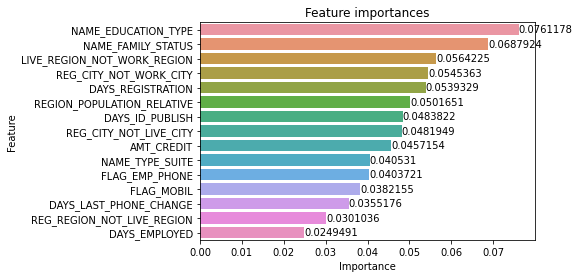

In [8]:
# Getting importances
importances = fea_sel_model.estimator_.feature_importances_
feature_names = X_train.columns

df_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

df_importances.sort_values(by='importance', ascending=False, inplace=True)
ax = sns.barplot(x='importance', y='feature', data=df_importances.head(15))
for i in ax.containers:
    ax.bar_label(i)
ax.set_title('Feature importances')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
plt.show()

In [24]:
fea_sel_model.get_support()

array([False, False,  True,  True, False,  True, False, False,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

## Training

In [9]:
# Getting best features
df_best_features = pd.concat([df_raw_fil[selected_features], df_raw_fil['TARGET']], axis=1)

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df_best_features.drop(columns='TARGET'),
    df_best_features['TARGET'],
    test_size=0.3,
    random_state=42,
    stratify=df_best_features['TARGET']
)

# Catetorical features
cat_features = df_best_features.select_dtypes(include="object").columns.to_list()
cat_features += df_best_features.select_dtypes(include="int64").columns.to_list()

# Numerical features
num_features = list(set(df_best_features.columns) - set(cat_features))

cat_features.remove("TARGET")

In [12]:
# Numerical pipeline
pipe_tr_features_num = Pipeline([
    ('input_median', SimpleImputer(strategy='median')),
    ('standard_scaler', StandardScaler())
])

# Categorical pipeline
pipe_tr_features_cat = Pipeline([
    ('input_most_frequent', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Column transformer for feature selection
pre_processor = ColumnTransformer([
    ('tr_num', pipe_tr_features_num, num_features),
    ('tr_cat', pipe_tr_features_cat, cat_features)
])


pipe_final = Pipeline([
    ('pre_processor', pre_processor),
    ('est_xgb', XGBClassifier(random_state=42, scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1]))
])

pipe_final

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('tr_num',
                                                  Pipeline(steps=[('input_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['DAYS_REGISTRATION',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'AMT_CREDIT',
                                                   'DAYS_LAST_PHONE_CHANGE']),
                                                 ('tr_cat',
                                                  Pipeline(steps=[('input_most_frequent',
                                                                   SimpleImputer(strategy='most_fr...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

In [13]:
# Hyperparameter tuning
hyperparams = {
    'est_xgb__learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'est_xgb__max_depth' : [3, 4, 5, 6, 8, 10, 12, 15],
    'est_xgb__min_child_weight' : [1, 3, 5, 7 ],
    'est_xgb__gamma': [0.0, 0.1, 0.2 , 0.3, 0.4],
    'est_xgb__colsample_bytree' : [0.3, 0.4, 0.5 , 0.7] 
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Defining Model
rand_xgb = RandomizedSearchCV(
    estimator=pipe_final,
    param_distributions=hyperparams,
    scoring='f1',
    cv=cv,
    verbose=200,
    n_jobs=-1,
)

In [14]:
rand_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[10:15:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "C", "kernel" } are not used.



RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('pre_processor',
                                              ColumnTransformer(transformers=[('tr_num',
                                                                               Pipeline(steps=[('input_median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standard_scaler',
                                                                                                StandardScaler())]),
                                                                               ['DAYS_REGISTRATION',
                                                                                'REGION_POPULATION_RELATIVE',
                                                                                'AMT_CREDIT',
                                                                                'DAYS_LAST_PHONE_C...
                                                            max_depth=None,
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            n_estimators=100,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            predictor=None,
                                                            random_state=42, ...))]),
                   n_jobs=-1,
                   param_distributions={'est_xgb__C': [0.1, 1, 10, 100, 1000],
                                        'est_xgb__gamma': [1, 0.1, 0.01, 0.001,
                                                           0.0001],
                                        'est_xgb__kernel': ['rbf', 'linear']},
                   scoring='f1', verbose=200)

In [15]:

y_pred = rand_xgb.predict(X_test)
print(classification_report(y_test, y_pred))
rand_xgb.predict_proba(X_test)

C:\Users\leoei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [6, 7, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      0.65      0.77     67812
           1       0.12      0.54      0.20      5991

    accuracy                           0.64     73803
   macro avg       0.53      0.60      0.48     73803
weighted avg       0.88      0.64      0.72     73803



C:\Users\leoei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [6, 7, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0.55301636, 0.44698364],
       [0.31652284, 0.68347716],
       [0.5541446 , 0.4458554 ],
       ...,
       [0.35380208, 0.6461979 ],
       [0.6556567 , 0.34434333],
       [0.6152582 , 0.38474175]], dtype=float32)

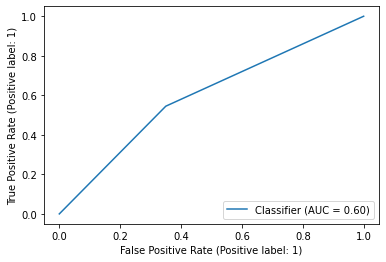

In [16]:
RocCurveDisplay.from_predictions(y_test, y_pred)

In [17]:
roc_auc_score(y_test, y_pred)

0.5975082927582549